In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as sk

plt.close('all')
xx = pd.read_csv("covid_serological_results.csv")
xx=xx[xx.COVID_swab_res!=1]
xx.COVID_swab_res[xx.COVID_swab_res==2]=1
swab=xx.COVID_swab_res.values
Test1=xx.IgG_Test1_titre.values
Test2=xx.IgG_Test2_titre.values

In [2]:
xx.describe()

,COVID_swab_res,IgG_Test1_titre,IgG_Test2_titre
count,862.000000,862.000000,862.000000
mean,0.082367,9.374849,0.803515
std,0.275082,20.431089,2.064172
min,0.000000,2.500000,0.000000
25%,0.000000,2.500000,0.020000
50%,0.000000,2.500000,0.030000
75%,0.000000,5.175000,0.070000
max,1.000000,314.000000,9.690000


array([[<Axes: xlabel='COVID_swab_res', ylabel='COVID_swab_res'>,
        <Axes: xlabel='IgG_Test1_titre', ylabel='COVID_swab_res'>,
        <Axes: xlabel='IgG_Test2_titre', ylabel='COVID_swab_res'>],
       [<Axes: xlabel='COVID_swab_res', ylabel='IgG_Test1_titre'>,
        <Axes: xlabel='IgG_Test1_titre', ylabel='IgG_Test1_titre'>,
        <Axes: xlabel='IgG_Test2_titre', ylabel='IgG_Test1_titre'>],
       [<Axes: xlabel='COVID_swab_res', ylabel='IgG_Test2_titre'>,
        <Axes: xlabel='IgG_Test1_titre', ylabel='IgG_Test2_titre'>,
        <Axes: xlabel='IgG_Test2_titre', ylabel='IgG_Test2_titre'>]],
      dtype=object)

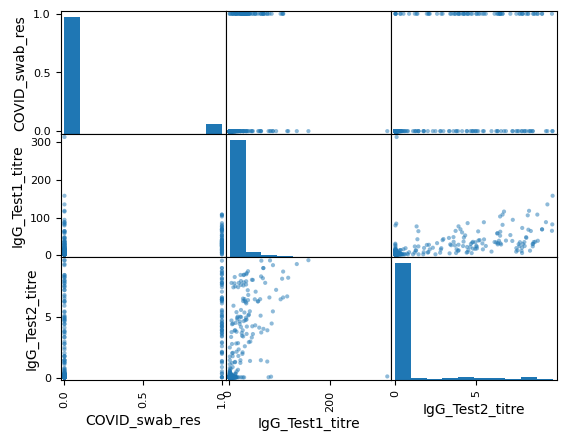

In [3]:
pd.plotting.scatter_matrix(xx)

In [4]:
x=Test2
y=swab
x0=x[swab==0]
x1=x[swab==1]
Np=np.sum(swab==1)
Nn=np.sum(swab==0)
thresh = 5
n1=np.sum(x1>thresh)
sens =n1/Np
n0=np.sum(x0<thresh)
spec=n0/Nn
print(sens)
print(spec)

0.4788732394366197
0.9620733249051833


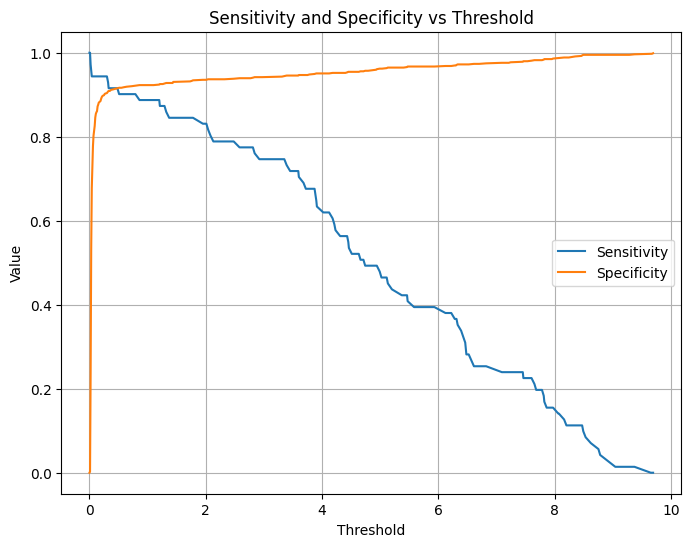

In [5]:
def calculate_sensitivity_specificity(thresholds, x, swab):
    sensitivity = []
    specificity = []

    for thresh in thresholds:
        n1 = np.sum((swab == 1) & (x > thresh))
        n0 = np.sum((swab == 0) & (x < thresh))

        sens = n1 / np.sum(swab == 1)
        spec = n0 / np.sum(swab == 0)

        sensitivity.append(sens)
        specificity.append(spec)

    return sensitivity, specificity

sorted_test2 = np.sort(Test2)

thresholds = np.unique(np.concatenate(([0], sorted_test2)))

sensitivity_values, specificity_values = calculate_sensitivity_specificity(thresholds, Test2, swab)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, sensitivity_values, label='Sensitivity')
plt.plot(thresholds, specificity_values, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Sensitivity and Specificity vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
FA=1-spec

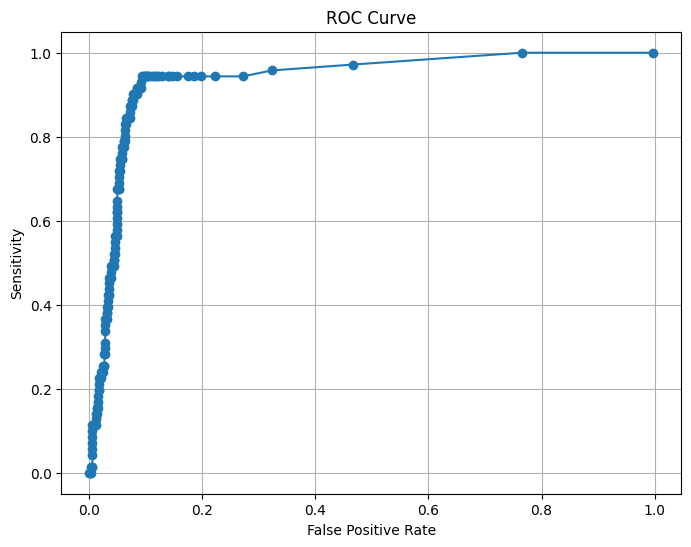

In [7]:
def calculate_sensitivity_specificity(thresholds, x, swab):
    sensitivity = []
    specificity = []

    for thresh in thresholds:
        n1 = np.sum((swab == 1) & (x > thresh))
        n0 = np.sum((swab == 0) & (x > thresh))  # False positive rate calculation

        sens = n1 / np.sum(swab == 1)
        spec = n0 / np.sum(swab == 0)

        sensitivity.append(sens)
        specificity.append(1 - spec)  # False positive rate is (1 - specificity)

    return sensitivity, specificity

sorted_test2 = np.sort(Test2)

thresholds = np.unique(np.concatenate(([0], sorted_test2)))

sensitivity_values, specificity_values = calculate_sensitivity_specificity(thresholds, Test2, swab)

plt.figure(figsize=(8, 6))
plt.plot(1 - np.array(specificity_values), sensitivity_values, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

In [8]:
def calculate_auc(x, y):
    x = np.array(x)
    y = np.array(y)

    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    auc = np.trapz(y_sorted, x_sorted)

    return auc

auc_value = calculate_auc(1 - np.array(specificity_values), sensitivity_values)
print(f"Area Under the Curve (AUC): {auc_value}")


Area Under the Curve (AUC): 0.9337440572639375


In [9]:
from sklearn.metrics import roc_auc_score

auc_value_trapezoidal = calculate_auc(1 - np.array(specificity_values), sensitivity_values)

auc_value_sklearn = roc_auc_score(swab, Test2)

print(f"AUC using trapezoidal rule: {auc_value_trapezoidal}")
print(f"AUC using sklearn's roc_auc_score: {auc_value_sklearn}")


AUC using trapezoidal rule: 0.9337440572639375
AUC using sklearn's roc_auc_score: 0.9362546963195099
